In [22]:
import pandas as pd
import seaborn as sns

In [23]:
df = pd.read_csv("../Data/Heart.csv")
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [25]:
df.dropna(inplace = True)

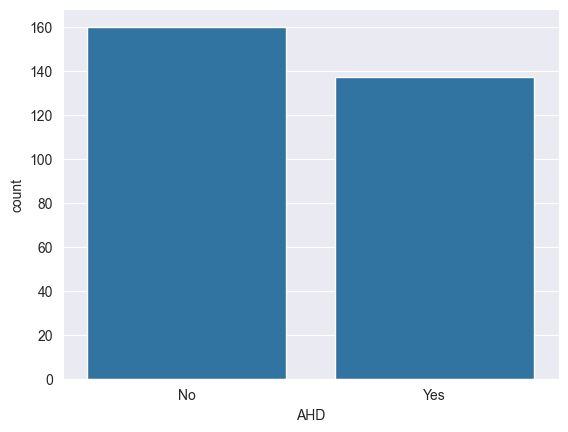

In [26]:
sns.countplot(data = df, x = 'AHD')
sns.set_style('darkgrid')

In [27]:
df = pd.get_dummies(df, drop_first = True)
df.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0,False,False,True,False,False,False
1,2,67,1,160,286,0,2,108,1,1.5,2,3.0,False,False,False,True,False,True
2,3,67,1,120,229,0,2,129,1,2.6,2,2.0,False,False,False,False,True,True
3,4,37,1,130,250,0,0,187,0,3.5,3,0.0,True,False,False,True,False,False
4,5,41,0,130,204,0,2,172,0,1.4,1,0.0,False,True,False,True,False,False


In [28]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.encoding:

get_dummies(data, prefix=None, prefix_sep: 'str | Iterable[str] | dict[str, str]' = '_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'NpDtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Each variable is converted in as many 0/1 variables as there are different
    values. Columns in the output are each named after a value; if the input is
    a DataFrame, the name of the original variable is prepended to the value.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a diction

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X, y = df.drop("AHD_Yes", axis = "columns"), df["AHD_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

              precision    recall  f1-score   support

       False       0.88      0.88      0.88        49
        True       0.85      0.85      0.85        41

    accuracy                           0.87        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90



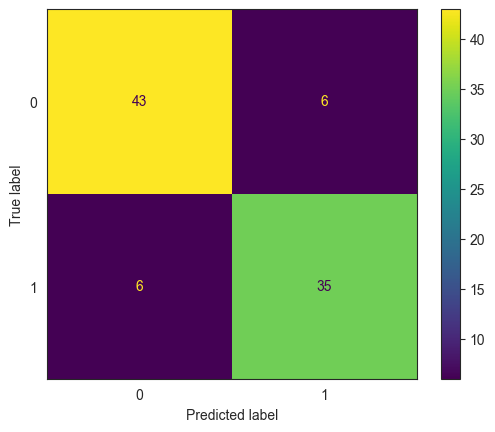

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

model = RandomForestClassifier(random_state = 42)
model.fit (X_train, y_train)

y_pred = model.predict (X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
sns.set_style('white')

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(RandomForestClassifier(random_state = 42))

params = {"randomforestclassifier__n_estimators": range(80, 200, 10), "randomforestclassifier__max_depth": [1, 2, 5]}

clf = GridSearchCV(estimator = pipe, cv = 5, param_grid = params, scoring = "recall")

clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__max_depth': [1, 2, 5],
                         'randomforestclassifier__n_estimators': range(80, 200, 10)},
             scoring='recall')

In [37]:
clf.best_params_

{'randomforestclassifier__max_depth': 2,
 'randomforestclassifier__n_estimators': 90}